# Initial Scope of Research
This repository contains a comprehensive data analysis of global internet usage trends, presented in a Jupyter Notebook. The analysis explores key metrics, regional variations, and growth patterns, providing insights into the digital connectivity landscape worldwide. The notebook is designed for researchers, analysts, and anyone interested in understanding the global impact of the internet.

# Data Source
https://www.kaggle.com/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators

# Initial Research Questions
1. Does Internet access and tax revenue drive down corruption?
2. Internet usage has something to Carbon emissions?
3. Does Internet usage drives electricity consumption and corruption?

# Data Cleaning

In [1]:
#Setup For Data Cleaning
import pandas as pd
import matplotlib as mp

#Read in the Data
df = pd.read_csv('world_bank_development_indicators.csv',parse_dates=True)
df['date'] =  pd.to_datetime(df['date'])

In [2]:
#Initial Data Exploration
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   country                                    17272 non-null  object        
 1   date                                       17272 non-null  datetime64[ns]
 2   agricultural_land%                         14714 non-null  float64       
 3   forest_land%                               8176 non-null   float64       
 4   land_area                                  14930 non-null  float64       
 5   avg_precipitation                          10086 non-null  float64       
 6   trade_in_services%                         9195 non-null   float64       
 7   control_of_corruption_estimate             4783 non-null   float64       
 8   control_of_corruption_std                  4783 non-null   float64       
 9   access_to_electri

,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,17272,14714.000000,8176.000000,1.493000e+04,10086.000000,9195.000000,4783.000000,4783.000000,7348.000000,8076.000000,...,455.000000,2108.000000,16037.000000,16019.000000,15866.000000,1.666500e+04,1.653900e+04,4850.000000,4850.000000,4209.000000
mean,1991-09-11 13:11:41.991662848,36.945264,32.408397,5.078664e+06,1214.021416,20.998956,-0.024874,0.203572,80.758176,31.029558,...,27.058386,37.797249,28.203391,10.490354,64.254193,2.159737e+08,1.231026e+08,-0.021062,0.167144,8.035708
min,1960-01-01 00:00:00,0.262821,0.000000,2.027000e+00,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,...,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.102437,0.000000
25%,1976-01-01 00:00:00,20.454545,12.430556,2.164000e+04,591.000000,8.678157,-0.791694,0.147978,68.435427,5.065460,...,18.300000,31.200000,16.438000,6.976522,56.810602,9.940000e+05,4.295845e+05,-0.850328,0.126422,1.348194
50%,1992-01-01 00:00:00,37.470745,30.765419,2.419300e+05,1110.000000,13.456865,-0.253887,0.172218,98.290939,20.989980,...,24.800000,35.700000,27.065000,9.200000,66.776719,6.787419e+06,3.148533e+06,0.020768,0.142207,3.428468
75%,2008-01-01 00:00:00,50.737179,47.118947,1.444290e+06,1782.000000,24.705827,0.666176,0.227055,100.000000,53.904220,...,33.300000,43.200000,39.752000,12.441818,72.568000,4.641603e+07,2.035198e+07,0.884255,0.196929,9.402278
max,2023-01-01 00:00:00,93.440750,98.574551,1.299507e+08,3240.000000,327.166162,2.459118,0.942502,100.000000,98.340000,...,74.200000,65.800000,58.121000,103.534000,85.497561,7.950947e+09,3.435260e+09,1.800992,0.578548,138.773986
std,NaN,20.552401,23.355506,1.406167e+07,810.573031,23.260442,1.000047,0.087529,28.745226,29.858553,...,11.262910,8.835216,12.862546,5.358976,11.112156,7.102653e+08,4.087475e+08,0.998757,0.064188,12.026623


In [220]:
#List out columns for selection
df.columns

Index(['country', 'date', 'agricultural_land%', 'forest_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'electric_power_consumption', 'CO2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual%',
       'real_interest_rate', 'risk_premium_on_lending',
       'research_and_development_expenditure%', 'central_goverment_debt%',
       'tax_revenue%', 'expense%', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet%', 'logistic_performance_index',
       'military_expenditure%', 'GDP_current_US',
       'political_stability_estimate', 'political_stability_std',
       'rule_of_law_estimate', 'rule_of_law_std',
       'reg

# Project Data Frame(s) Setup

In [174]:
#Extract speicific columns for analysis
#df_project = df[['date','country','population', 'individuals_using_internet%','tax_revenue%','electric_power_consumption','control_of_corruption_estimate','CO2_emisions','access_to_electricity%','death_rate','life_expectancy_at_birth','intentional_homicides']]
df_project = df[['date','country', 'individuals_using_internet%']]

In [175]:
#Check for missing values and drop them
df_clean = df_project.dropna()

In [176]:
#Final project dataframe for analysis
df_clean

,date,country,individuals_using_internet%
30,1990-01-01,Afghanistan,0.000000
31,1991-01-01,Afghanistan,0.000000
32,1992-01-01,Afghanistan,0.000000
33,1993-01-01,Afghanistan,0.000000
34,1994-01-01,Afghanistan,0.000000
...,...,...,...
17265,2017-01-01,Zimbabwe,24.400000
17266,2018-01-01,Zimbabwe,25.000000
17267,2019-01-01,Zimbabwe,26.588274
17268,2020-01-01,Zimbabwe,29.298565


In [128]:
#Explore project dataframe 
df_clean.describe()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1106 entries, 228 to 17260
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            1106 non-null   datetime64[ns]
 1   country                         1106 non-null   object        
 2   population                      1106 non-null   float64       
 3   individuals_using_internet%     1106 non-null   float64       
 4   tax_revenue%                    1106 non-null   float64       
 5   electric_power_consumption      1106 non-null   float64       
 6   control_of_corruption_estimate  1106 non-null   float64       
 7   CO2_emisions                    1106 non-null   float64       
 8   access_to_electricity%          1106 non-null   float64       
 9   death_rate                      1106 non-null   float64       
 10  life_expectancy_at_birth        1106 non-null   float64       
 11  intent

In [147]:
df_clean.columns

Index(['date', 'country', 'population', 'individuals_using_internet%',
       'tax_revenue%', 'electric_power_consumption',
       'control_of_corruption_estimate', 'CO2_emisions',
       'access_to_electricity%', 'death_rate', 'life_expectancy_at_birth',
       'intentional_homicides'],
      dtype='object')

In [129]:
# Country Data Frame Setup
df_countries = df_clean.groupby('country').max().sort_values(by='individuals_using_internet%',ascending=False)


In [130]:
df_countries

,date,population,individuals_using_internet%,tax_revenue%,electric_power_consumption,control_of_corruption_estimate,CO2_emisions,access_to_electricity%,death_rate,life_expectancy_at_birth,intentional_homicides
country,,,,,,,,,,,
Iceland,2014-01-01,327386.0,98.160000,27.242993,54799.174708,2.327251,2382.97,100.000000,7.000,82.917073,1.776439
Norway,2014-01-01,5137232.0,96.300000,28.798299,25424.103637,2.286828,40116.40,100.000000,10.000,82.100000,2.240812
Denmark,2014-01-01,5643475.0,95.990000,36.500292,6646.685948,2.399264,73375.10,100.000000,11.600,80.700000,1.309583
Sweden,2014-01-01,9696110.0,94.783600,29.858925,15709.429669,2.277121,63647.40,100.000000,10.600,82.253659,1.211225
Luxembourg,2014-01-01,556319.0,94.670000,25.601177,16829.962541,2.153153,11912.90,100.000000,9.400,82.229268,1.972116
...,...,...,...,...,...,...,...,...,...,...,...
Ethiopia,2012-01-01,94451280.0,2.900000,9.377595,56.166523,-0.608587,8559.00,29.016552,8.119,61.543000,8.631964
Indonesia,2004-01-01,225938595.0,2.600286,15.027588,468.804367,-0.976612,341235.40,89.010000,7.995,67.413000,0.845780
Kuwait,1996-01-01,1703318.0,0.855662,0.965097,13311.078730,0.478682,35628.60,100.000000,2.011,75.618000,0.939343


In [131]:
#Global Data Frame Setup
df_global = df_clean.drop(["country"],axis=1).groupby('date').mean()


In [120]:
df_global

,population,individuals_using_internet%,tax_revenue%,electric_power_consumption,control_of_corruption_estimate,CO2_emisions,access_to_electricity%,death_rate,life_expectancy_at_birth
date,,,,,,,,,
1996-01-01,3.916128e+07,2.789485,18.031550,5053.075216,0.615885,199927.850794,89.700454,8.905730,71.701466
1998-01-01,3.974546e+07,7.302923,17.683505,5053.215818,0.469128,192919.854348,89.247835,8.822710,71.360680
2000-01-01,3.846834e+07,14.489218,18.023628,4965.601994,0.460393,217526.365403,91.647405,8.699097,72.317396
2002-01-01,4.043046e+07,20.530497,16.954685,4546.126256,0.295532,189044.365854,86.307400,8.923512,71.107637
2003-01-01,4.094711e+07,23.278345,16.952109,4557.401156,0.279563,191780.849880,86.811914,8.753916,71.379877
2004-01-01,4.057071e+07,25.955842,17.309214,4583.805761,0.236551,192197.651310,86.470589,8.652595,71.519036
2005-01-01,5.392858e+07,29.394407,18.152938,4534.369994,0.283749,261492.605714,86.727938,8.677369,72.118976
2006-01-01,5.339823e+07,32.095762,18.865997,4655.442566,0.317715,267759.554235,87.967700,8.684012,72.310115
2007-01-01,5.279769e+07,35.041203,19.191196,4738.684321,0.298827,272488.293333,87.972290,8.693126,72.541275


# Statistical Analysis

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

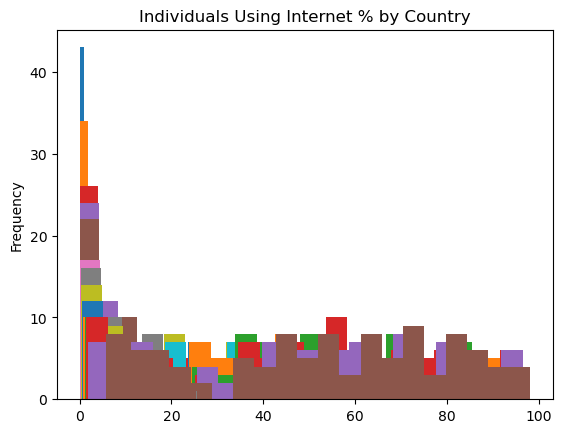

In [36]:
df_countries['individuals_using_internet%'].plot(kind='hist',bins=20),plt.title('Individuals Using Internet % by Country')
plt.show()

In [41]:
def country_net_plot(country):
    df_special = df_clean[df_clean['country'] == country]
    df_special.plot(x='date',y='individuals_using_internet%',kind='line',title=f'{country} Internet Usage Over Time')
    plt.show()

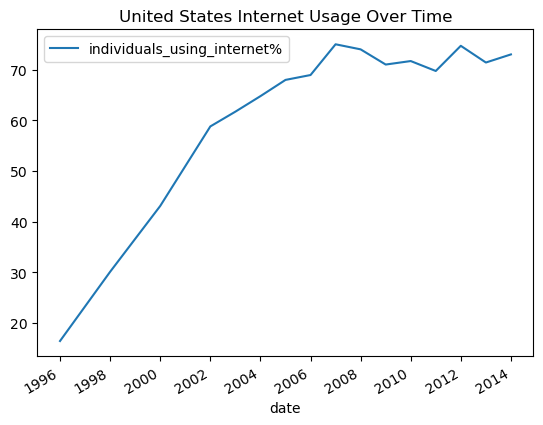

In [42]:
country_net_plot('United States')

In [45]:
def country_net_taxpercentage(country):
    df_test = df_clean[df_clean['country'] == country]
    
    fig, ax = plt.subplots()
    df_test.plot(x='date', y='tax_revenue%', kind='line', ax=ax, label='Tax Revenue')
    df_test.plot(x='date', y='individuals_using_internet%', kind='line', ax=ax, label='Internet Users')
    
    plt.title(country)
    plt.legend()
    plt.show()

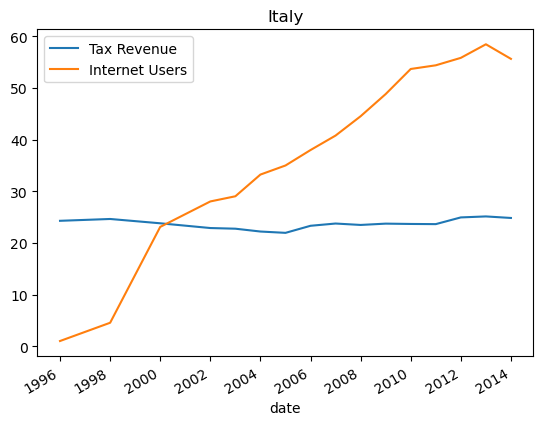

In [59]:
country_net_taxpercentage('Italy')

In [47]:
def country_compare_features(country, feature1, feature2):
    df_test = df_clean[df_clean['country'] == country]
    
    fig, ax = plt.subplots()
    df_test.plot(x='date', y=feature1, kind='line', ax=ax, label=feature1)
    df_test.plot(x='date', y=feature2, kind='line', ax=ax, label=feature2)
    
    plt.title(country)
    plt.legend()
    plt.show()

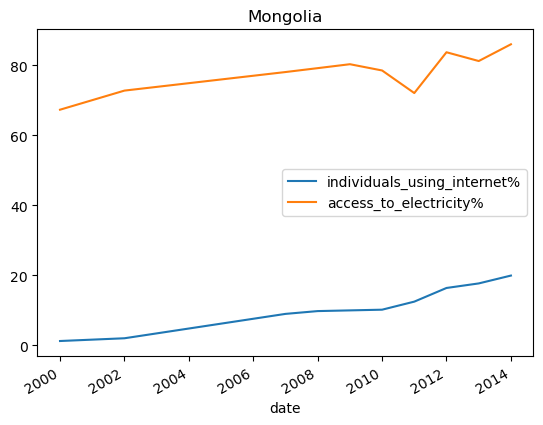

In [79]:
country_compare_features('Mongolia', 'individuals_using_internet%', 'access_to_electricity%')

In [53]:
def global_compare_features(feature1, feature2):
    fig, ax = plt.subplots()
    df_global.plot(y=feature1, kind='line', ax=ax, label=feature1)
    df_global.plot(y=feature2, kind='line', ax=ax, label=feature2)
    
    plt.title('Global')
    plt.legend()
    plt.show()

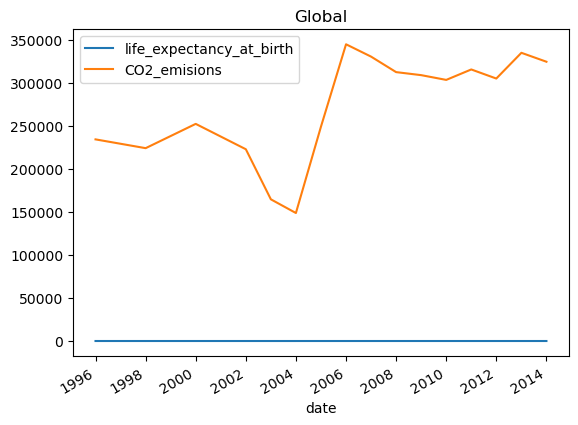

In [138]:
global_compare_features('life_expectancy_at_birth','CO2_emisions')  

In [81]:
# Assuming "corruption" and "internet usage" are columns in the "df_global" DataFrame
correlation = df_global['control_of_corruption_estimate'].corr(df_global['access_to_electricity%'])
print(f"Correlation between corruption and internet usage: {correlation}")

Correlation between corruption and internet usage: -0.8627258260571724


In [82]:
import pandas as pd

# Assuming df_global is your dataframe
correlation_matrix = df_global.corr()

# Print the correlation matrix
print(correlation_matrix)

                                population  individuals_using_internet%  \
population                        1.000000                     0.116816   
individuals_using_internet%       0.116816                     1.000000   
tax_revenue%                     -0.975140                    -0.131552   
electric_power_consumption       -0.994804                    -0.095217   
control_of_corruption_estimate   -0.945888                    -0.318842   
CO2_emisions                      0.966156                     0.323025   
access_to_electricity%            0.954123                     0.086981   

                                tax_revenue%  electric_power_consumption  \
population                         -0.975140                   -0.994804   
individuals_using_internet%        -0.131552                   -0.095217   
tax_revenue%                        1.000000                    0.977579   
electric_power_consumption          0.977579                    1.000000   
control_of_corrupti

In [ ]:
# Statistical Analysis

In [104]:
# Add the linear regression equation and line to plot
from statistics import linear_regression

def linear(x,y,DataFrame):
    x_values = DataFrame[x]
    y_values = DataFrame[y]
    (slope, intercept) = linear_regression(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    correlation = DataFrame[x].corr(DataFrame[y])
    print(f"{correlation}") 

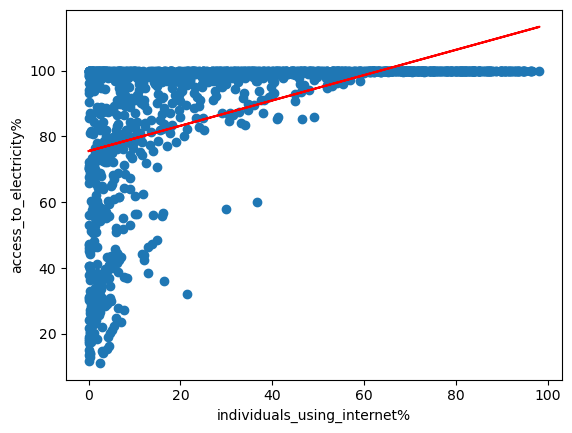

0.5177737461714105


In [105]:
linear('individuals_using_internet%','access_to_electricity%',df_clean)

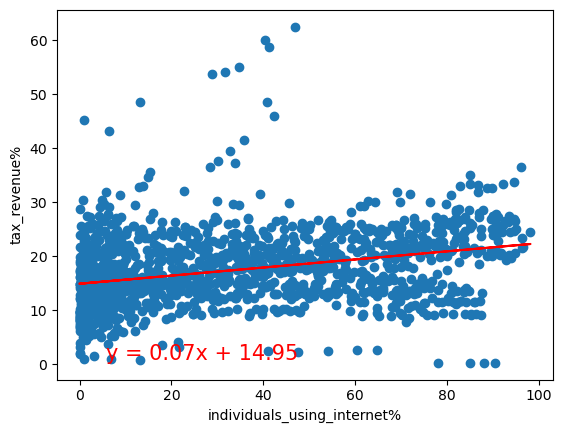

0.30826717206639365


In [106]:
linear('individuals_using_internet%','tax_revenue%',df_clean)

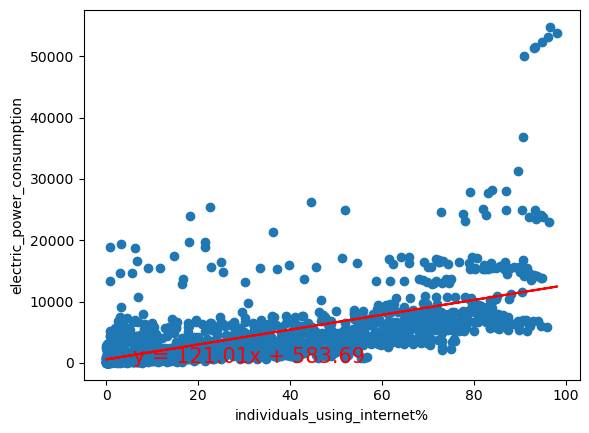

0.5896473924369613


In [107]:
linear('individuals_using_internet%','electric_power_consumption',df_clean)

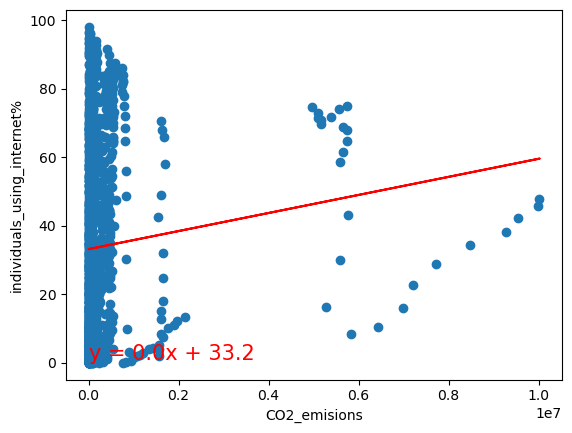

0.08443694333778695


In [109]:
linear('CO2_emisions','individuals_using_internet%',df_clean)

In [121]:
df_clean.columns

Index(['date', 'country', 'population', 'individuals_using_internet%',
       'tax_revenue%', 'electric_power_consumption',
       'control_of_corruption_estimate', 'CO2_emisions',
       'access_to_electricity%', 'death_rate', 'life_expectancy_at_birth'],
      dtype='object')

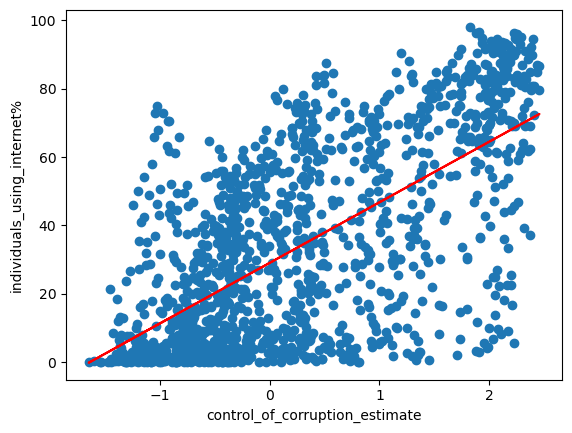

0.6558151159588961


In [122]:
linear('control_of_corruption_estimate','individuals_using_internet%',df_clean)

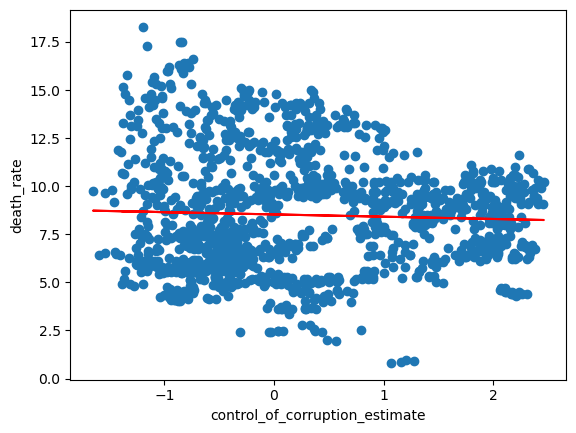

-0.04250274628976744


In [124]:
linear('control_of_corruption_estimate','death_rate',df_clean)

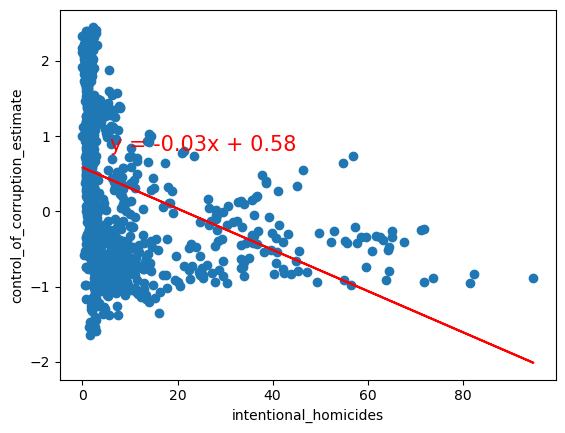

-0.33960296551194674


In [134]:
linear('intentional_homicides','control_of_corruption_estimate',df_clean)

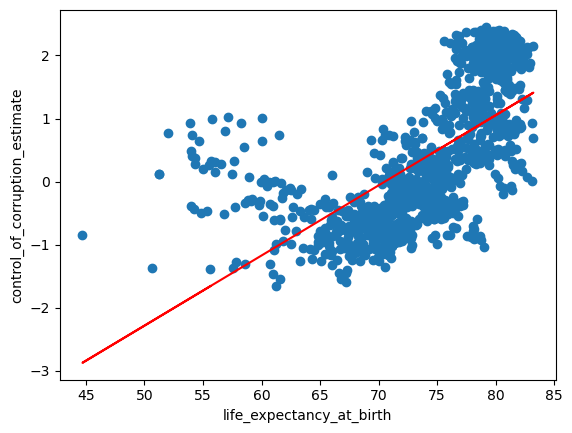

0.6534145733556008


In [135]:
linear('life_expectancy_at_birth','control_of_corruption_estimate',df_clean)

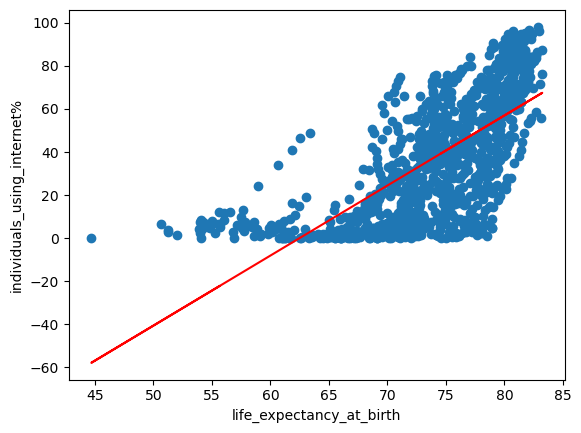

0.706064557178696


In [136]:
linear('life_expectancy_at_birth','individuals_using_internet%',df_clean)

NameError: name 'country' is not defined

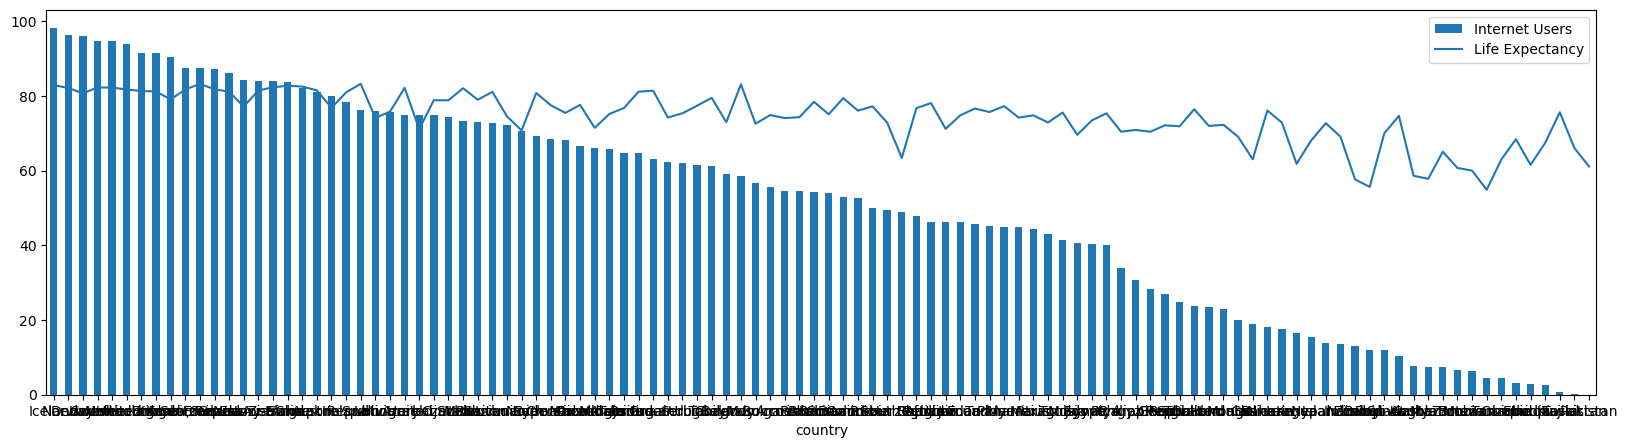

In [196]:
fig, ax = plt.subplots()
df_countries.plot(y='individuals_using_internet%', kind='bar', label='Internet Users', ax=ax)
df_countries.plot(y='life_expectancy_at_birth', kind='line', ax=ax, label='Life Expectancy', figsize=(20,5))
plt.title(country)
plt.legend()
plt.show()




In [181]:
df_countries

,date,population,individuals_using_internet%,tax_revenue%,electric_power_consumption,control_of_corruption_estimate,CO2_emisions,access_to_electricity%,death_rate,life_expectancy_at_birth,intentional_homicides
country,,,,,,,,,,,
Iceland,2014-01-01,327386.0,98.160000,27.242993,54799.174708,2.327251,2382.97,100.000000,7.000,82.917073,1.776439
Norway,2014-01-01,5137232.0,96.300000,28.798299,25424.103637,2.286828,40116.40,100.000000,10.000,82.100000,2.240812
Denmark,2014-01-01,5643475.0,95.990000,36.500292,6646.685948,2.399264,73375.10,100.000000,11.600,80.700000,1.309583
Sweden,2014-01-01,9696110.0,94.783600,29.858925,15709.429669,2.277121,63647.40,100.000000,10.600,82.253659,1.211225
Luxembourg,2014-01-01,556319.0,94.670000,25.601177,16829.962541,2.153153,11912.90,100.000000,9.400,82.229268,1.972116
...,...,...,...,...,...,...,...,...,...,...,...
Ethiopia,2012-01-01,94451280.0,2.900000,9.377595,56.166523,-0.608587,8559.00,29.016552,8.119,61.543000,8.631964
Indonesia,2004-01-01,225938595.0,2.600286,15.027588,468.804367,-0.976612,341235.40,89.010000,7.995,67.413000,0.845780
Kuwait,1996-01-01,1703318.0,0.855662,0.965097,13311.078730,0.478682,35628.60,100.000000,2.011,75.618000,0.939343
